#  Uporaba numeričnih metod za reševanje diferencialnih enačb - prehodni pojav pri R L C vezjih



<br>
<center>Dejan Križaj, 2019</center>

**Namen:** Zvezek (Notebook) je namenjen seznanjanju študentov s prehodnim pojavom. Kako se pride do diferencialne enačbe je opisano v učbeniku, tu pa je mogoče uporabiti numerično reševanje diferencialnih enačb z uporabo Python knjižnice $odeint$.

Knjižnica $odeint$ uporablja več metod za numerično reševanje diferencialnih enačb.Najbolj preprosta je Eulerjeva metoda, kjer odvod $\frac{dx}{dt}=f(x)$ aproksimiramo kar z diferenco funkcije v določenem časovnem koraku:
$x(t+h)=x(t)+hf(x(t))$. 

Bolj natančne so metode, ki odvod bolj natančno aproksimirajo. Na primer Euler-Richardsonova metoda, pri kateri se uporabi za odvod vmesne vrednosti $x(t+h)=x(t)+hf(x(t)+hf(x(t))/2)$.
Ta metoda je znana tudi kot Runge-Kutta metoda drugega reda. Še bolj pogosto se uporablja Runge-Kutta metodo četrtega reda ali tudi druge metode, odvisno od aplikacije. Funkcija $odeint$ si ob uporabi "sama" izbere najustreznejši način reševanja.

Namen tega izvajanja ni predstavitev numeričnih metod, pač pa njihova uporaba v konkretnih primerih analize prehodnih pojavov pri električnih vezjih. Za dodatne razlage numeričnih postopkov, si lahko ogledate spodnje spletne strani, iz katerih sem izdelal primere.  

Viri: https://toyoki-lab.ee.yamanashi.ac.jp/~toyoki/lectures/simulationMethods/NumericalMethods1.html in
https://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html

<div class="alert alert-block alert-info">
<b>Namig:</b> Obstajata dve verziji tega dokumenta. Ena je v obliki html datoteke (končnica html), ki je ni mogoče izvajati, druga pa ima končnico ipny (Jupyter Notebook), ki jo lahko izvajamo z Jupyter aplikacijo. To aplikacijo imate lahko naloženo na vašem računalniku in se izvaja v brskalniku, lahko jo ogledujete s spletno aplikacijo nbViewer, s spletnimi aplikacijami Binder ali Google Colab pa jo lahko tudi zaganjate in spreminjate. Več o tem si preberite v 
<a href="http://lbm.fe.uni-lj.si/index.php?option=com_content&view=article&id=59&Itemid=135&lang=si">tem članku</a>.
</div>

## <center>Zaporedno R+C vezje</center>

<img src="https://raw.githubusercontent.com/osnove/Slike/master/RC_vezje.png" style="height:150px"> 

V primerih bomo uporabili vklop vira $Ug$ na zaporedno vezavo upora in kondenzatorja. Na sliki je konstanten vir, v spodnjih vrsticah bomo prikazali vklop na vir različnih oblik signala.

### Vklop RC vezja na vir s harmoničnim signalom

Rešujemo enačbo ${{u}_{g}}=RC\frac{\text{d}{{u}_{C}}}{\text{d}t}+{{u}_{C}}$, 
kjer je ${{u}_{g}}(t)={{U}_{g}}\cos (\omega t+{{\varphi }_{g}})$.



Enačbo zapišemo v obliki ${\frac{\text{d}{{u}_{C}}}{\text{d}t}=({u}_{g}}-{{u}_{C})/RC}$.
> Začetni pogoj bo odvisen od časa preklopa,saj velja $u_C(t=0^+)=u_C(t=0^-)$ .

0.0005


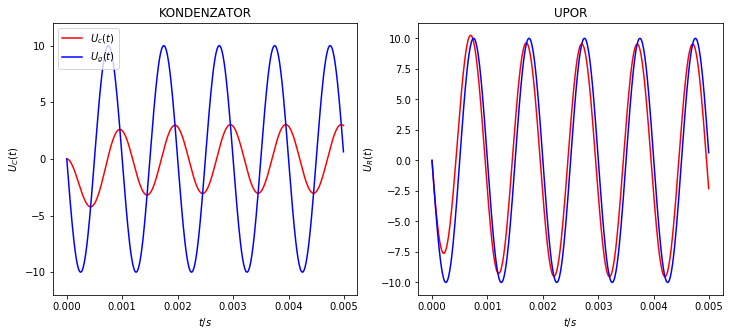

In [8]:
## Vnos potrebnih knjižnic
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Vrednosti konstant
R=5e3
C=1e-7
RC=R*C
print(RC)
Ug=10
omega=2*np.pi*1000
fi=np.pi/2

def dUc_dt(u,t):   # Zapis diferencialne enačbe v obliki funkcije, ki vrne izračun desne strani enačbe, torej odvod napetosti po času
    return (Ug*np.cos(omega*t+fi)-u)/RC

def plot_func(t,x):  # Priprava funkcije za izris
    fig = plt.figure(figsize=(12,5))
    axes = fig.add_subplot(1,2,1)
    axes.plot(t, x[:,0], 'r', label="$U_c(t)$")
    axes.plot(t, Ugt, 'b-', label="$U_g(t)$")
    plt.ylim([-1.2*Ug, +1.2*Ug])
    axes.set_xlabel("$t /s $")
    axes.set_ylabel("$U_C(t)$")
    plt.title('KONDENZATOR')
    plt.legend(loc='upper left')
    
    #izris napetosti na uporu - izračunan kot Ug(t)-uC(t)
    axes = fig.add_subplot(1,2,2)
    axes.plot(t,Ugt-x[:,0], 'r', label="$U_R(t)$")
    axes.plot(t, Ugt, 'b-', label="$U_g(t)$")
    axes.set_xlabel("$t /s $")
    axes.set_ylabel("$U_R(t)$")
    plt.title('UPOR')
    plt.show()

dt = 1e-5  # numerični časovni korak 
n_steps = 500  # število korakov
t = np.arange(0, n_steps*dt, dt)  # časovni niz sestavljen iz n_steps s časovnim korakom dt
Ugt=Ug*np.cos(omega*t+fi)  # Ug(t) kot časovni niz
u = np.zeros((1)) # začetni pogoj
u[0] = Ugt[0]    # Napetost na kondenzatorju ob preklopu
y = odeint(dUc_dt,(u[0]),t) # Zagon odeint funkcije, ki reši dif. enačbo
plot_func(t,y)

### Opravi naslednje analize:
1. spreminjaj fazni kot fi in opazuj spremembe. Ker se preklop opravi ob času t=0, fazni kot določa začetno napetost na kondenzatorju
2. spreminjaj frekvenco signala. Ob tem bo za boljši ogled potrebno spreminjati tudi časovno os (časovni korak dt). Opazuj spreminjanje amplitude napetosti na kondenzatorju in uporu.
3. pri fiksni frekvenci spreminjaj upornost upora in opazuj spremembe
4. pri fiksni frekvenci spreminjaj kapacitivnost kondenzatorja in opazuj spremembe

***
## Odziv RC vezja na pravokotni signal

Za izdelavo pravokotnega signala uporabimo funkcijo $signal.square$. To v programu uporabimo 2x, enkrat kot funkcijo Ug_t, ki vrne konkretno vrednost vzbujalne napetosti ob določenem času ($Ug(t)$), in drugič kot niz (array) vrednosti za vse diskretne čase - Ugt. 

(-12.0, 12.0)

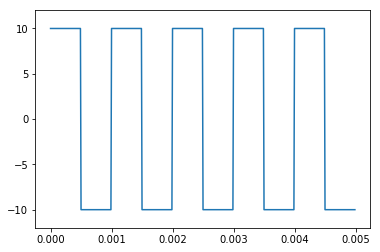

In [9]:
from scipy import signal
ug=Ug*signal.square(omega* t) # Izdelamo signal generatorja
plt.plot(t,ug )
plt.ylim(-1.2*Ug, 1.2*Ug)

0.005


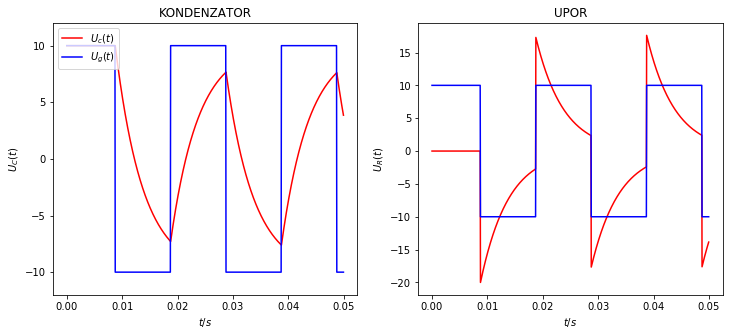

In [10]:
def Ug_t(t):  # vzbujalni signal kot funkcija. Nato rabim še Ugt - vzbujalni signal kot niz (glej spodaj)
    return Ug*signal.square(omega* t+fi) #+ Ug


def dUc1_dt(u,t):   # Zapis diferencialne enačbe v obliki funkcije, ki vrne desno stran enačbe, torej odvod napetosti po času
    return (Ug_t(t)-u)/RC

## Vrednosti konstant
R=5e3
C=1e-6
RC=R*C
print(RC)
Ug=10
omega=2*np.pi*50
fi=np.pi/8

dt = 5e-5  # numerični časovni korak 
n_steps = 1000  # število korakov
t = np.arange(0, n_steps*dt, dt)  # časovni niz sestavljen iz n_steps s časovnim korakom dt
Ugt=Ug*signal.square(omega* t+fi) #+ Ug # Izdelamo signal generatorja  # Ug(t) kot časovni niz
u = np.zeros((1)) # začetni pogoj
u[0] = Ugt[0]    # Napetost na kondenzatorju ob preklopu
y = odeint(dUc1_dt,(u[0]),t) 
plot_func(t,y)  # Za izris pokličemo isto funkcijo kot v prejšnjem primeru

### Opravi naslednje analize:
1. spreminjaj fazni kot fi in opazuj spremembe. Ker se preklop opravi ob času t=0, fazni kot določa začetno napetost na kondenzatorju
2. spreminjaj frekvenco signala. Ob tem bo za boljši ogled potrebno spreminjati tudi časovno os (časovni korak dt). 
    Opazuj spreminjanje dosežene max napetosti na kondenzatorju in uporu.
3. pri fiksni frekvenci spreminjaj upornost upora in opazuj spremembe.
4. pri fiksni frekvenci spreminjaj kapacitivnost kondenzatorja in opazuj spremembe. 
5. Spremeni zgornjo kodo tako, da bo imel vir dodano enosmerno komponento velikosti Ug in opazuj spremembe.Kako? Odkomentiraj del v vrsticah 2 in 20.

***
## Odziv RC vezja na usmerjen sinusni signal

Ugotavljamo odziv vezja na polnovalno usmerjen signal. Tak singla dobimo v vezju s t.i. mostično vezavo štirih usmerniških diod. To vezavo imenujemo tudi Graetzov mostiček.  

(-12.0, 12.0)

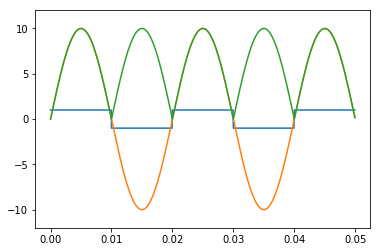

In [11]:
from scipy import signal
ug1=signal.square(omega* t) # Izdelamo signal generatorja
ug2=Ug*np.sin(omega*t)

plt.plot(t,ug1,t,ug2,t,ug1*ug2 )

plt.ylim(-1.2*Ug, 1.2*Ug)

0.005


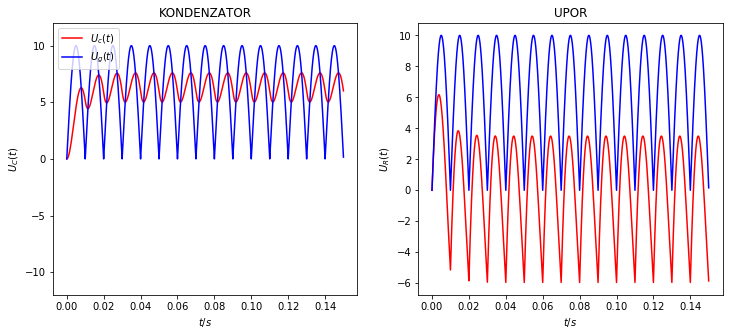

In [12]:
def Ug_t(t):  # vzbujalni signal kot funkcija. Nato rabim še Ugt - vzbujalni signal kot niz (glej spodaj)
    return Ug*signal.square(omega* t)*np.sin(omega*t)
    #return Ug*(signal.square(omega* t)+1)/2*np.sin(omega*t)


def dUc1_dt(u,t):   # Zapis diferencialne enačbe v obliki funkcije, ki vrne desno stran enačbe, torej odvod napetosti po času
    return (Ug_t(t)-u)/RC

## Vrednosti konstant
R=5e2
C=1e-5
RC=R*C
print(RC)
Ug=10
omega=2*np.pi*50
fi=np.pi/8

dt = 5e-5  # numerični časovni korak 
n_steps = 3000  # število korakov
t = np.arange(0, n_steps*dt, dt)  # časovni niz sestavljen iz n_steps s časovnim korakom dt
Ugt=Ug*signal.square(omega* t)*np.sin(omega*t) # Izdelamo signal generatorja  # Ug(t) kot časovni niz
#Ugt=Ug*(signal.square(omega* t)+1)/2*np.sin(omega*t)
u = np.zeros((1)) # začetni pogoj
u[0] = Ugt[0]    # Napetost na kondenzatorju ob preklopu
y = odeint(dUc1_dt,(u[0]),t) 
plot_func(t,y)  # Za izris pokličemo isto funkcijo kot v prejšnjem primeru

### Opravi naslednje analize:
1. pri fiksni frekvenci spreminjaj upornost upora in opazuj spremembe.
2. pri fiksni frekvenci spreminjaj kapacitivnost kondenzatorja in opazuj spremembe. 
3. Spremeni signal tako, da boš imel polvalno usmerjanje. Namig:spremeni množenje sinusnega signala z "dvignjenim" pravokotnim signalom, ki bo med 0 in 1. (v bistvu odkomentiraš vrsto 3 in 23). Primerjaj odziv na polvalno in polnovalno usmerjanje. Spreminjaj upornost in kapacitivnost in opazuj spremembe.